In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ml_python/Life_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ml_python/Life_test.csv')
df


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2322.000000,2489.000000,2009.000000,2489.000000,2461.000000,2489.000000,2471.000000,2293.000000,2471.000000,2489.000000,2103.000000,1.935000e+03,2461.000000,2461.000000,2343.00000,2343.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.600060,719.997905,80.884520,2508.917638,38.197887,44.378063,82.441926,5.952891,82.095508,1.777581,7320.511081,1.267212e+07,4.837424,4.882974,0.62521,11.932864
std,4.593657,9.626188,125.091120,122.898636,4.021613,1968.953987,25.110227,11795.371317,19.919937,167.571112,23.423987,2.489485,23.948337,5.184826,14023.224494,6.032759e+07,4.435967,4.546285,0.21130,3.387830
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.00000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.902500,4.344931,77.000000,0.000000,19.300000,0.000000,77.000000,4.280000,78.000000,0.100000,462.318087,2.062425e+05,1.600000,1.500000,0.48800,10.000000
50%,2007.000000,72.100000,144.000000,3.000000,3.775000,64.605901,92.000000,15.000000,43.200000,4.000000,93.000000,5.780000,93.000000,0.100000,1757.177970,1.395398e+06,3.300000,3.400000,0.67600,12.300000
75%,2011.000000,75.700000,228.000000,23.000000,7.677500,431.545247,97.000000,357.000000,56.200000,29.000000,97.000000,7.500000,97.000000,0.800000,5903.413690,7.321861e+06,7.200000,7.200000,0.77900,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.600000


In [4]:
df.isna().sum()

,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,167
percentage expenditure,0
Hepatitis B,480
Measles,0
BMI,28
under-five deaths,0


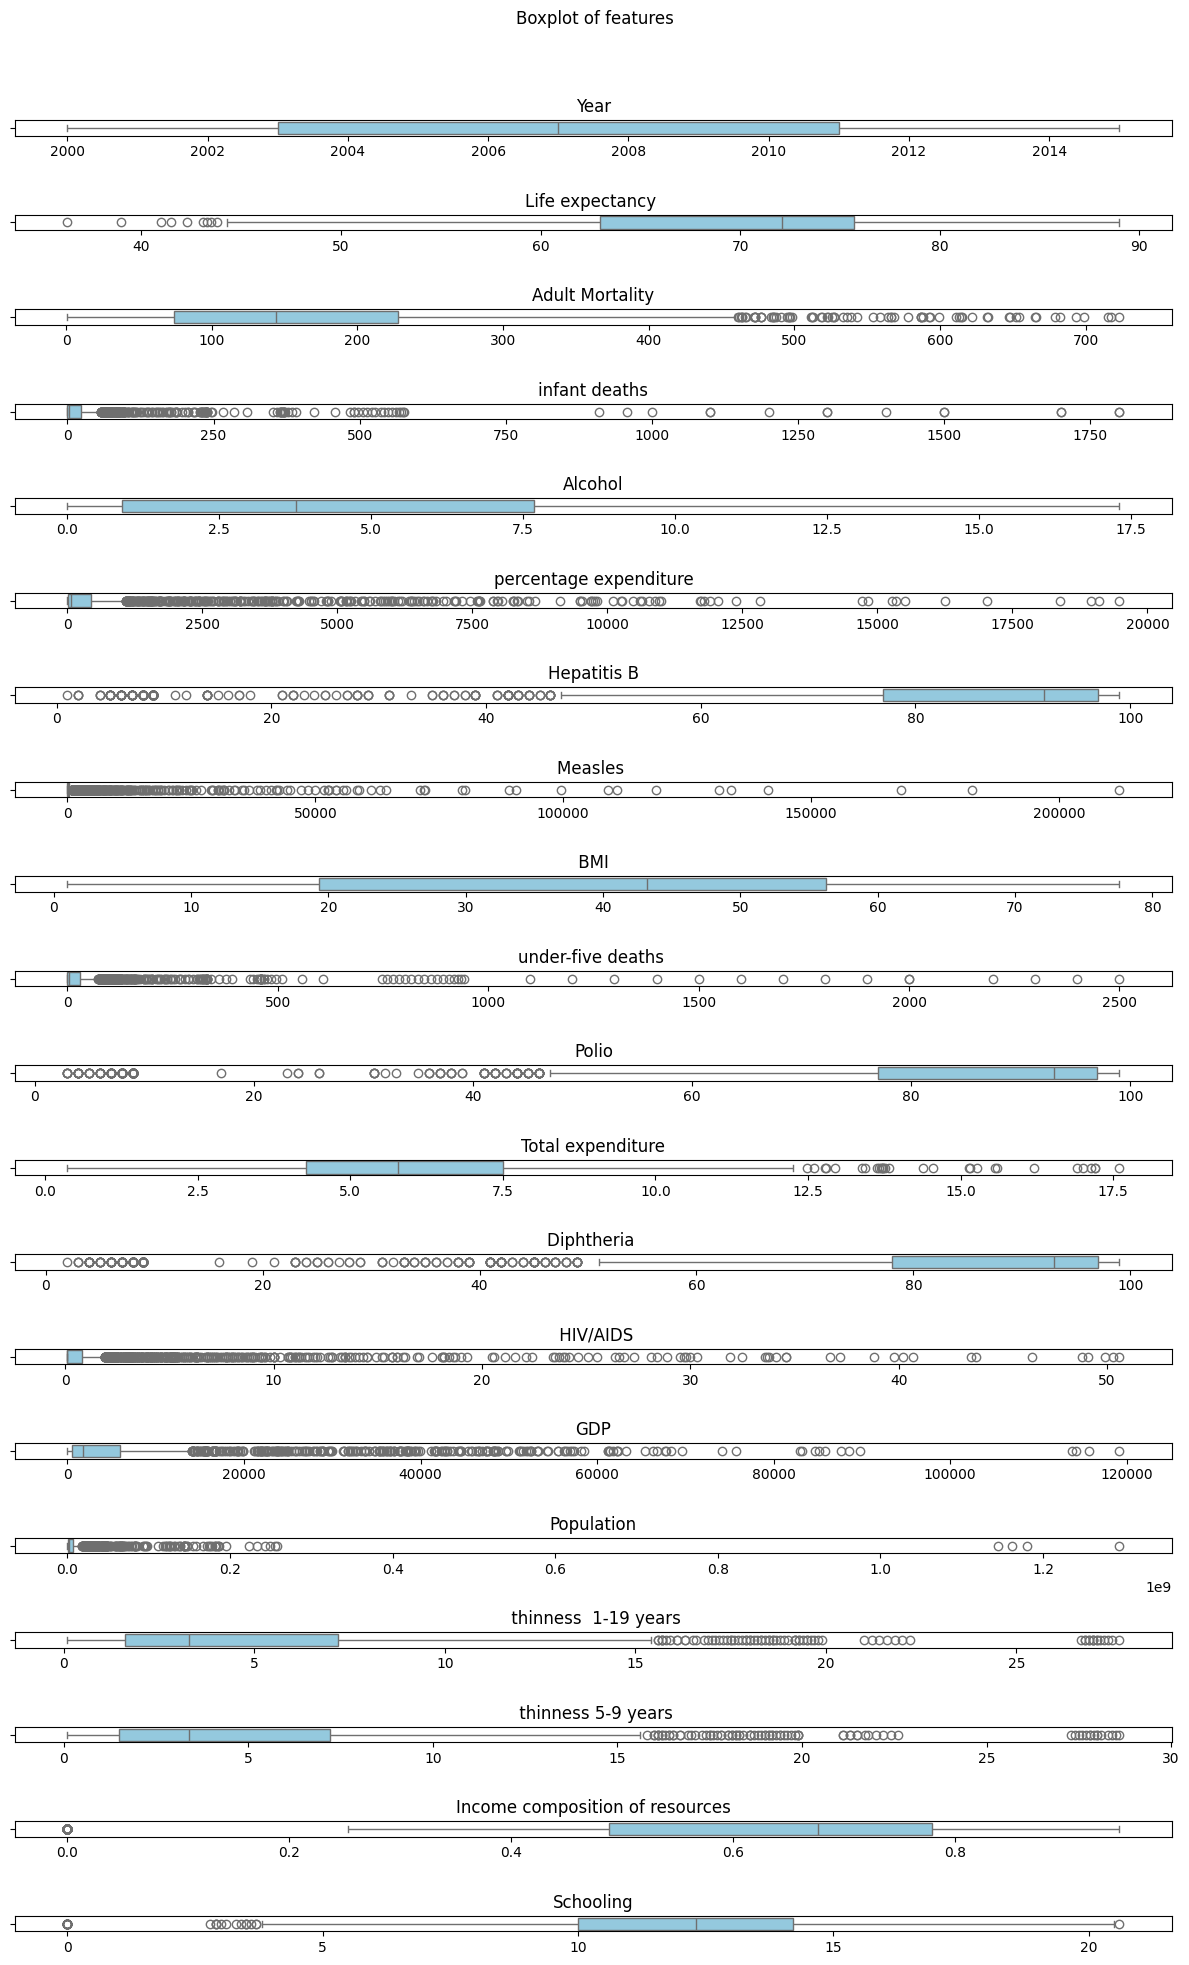

In [5]:
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(12, 20))
fig.suptitle('Boxplot of features')

for ax, column in zip(axs, df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[column], ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Распределение числовых признаков

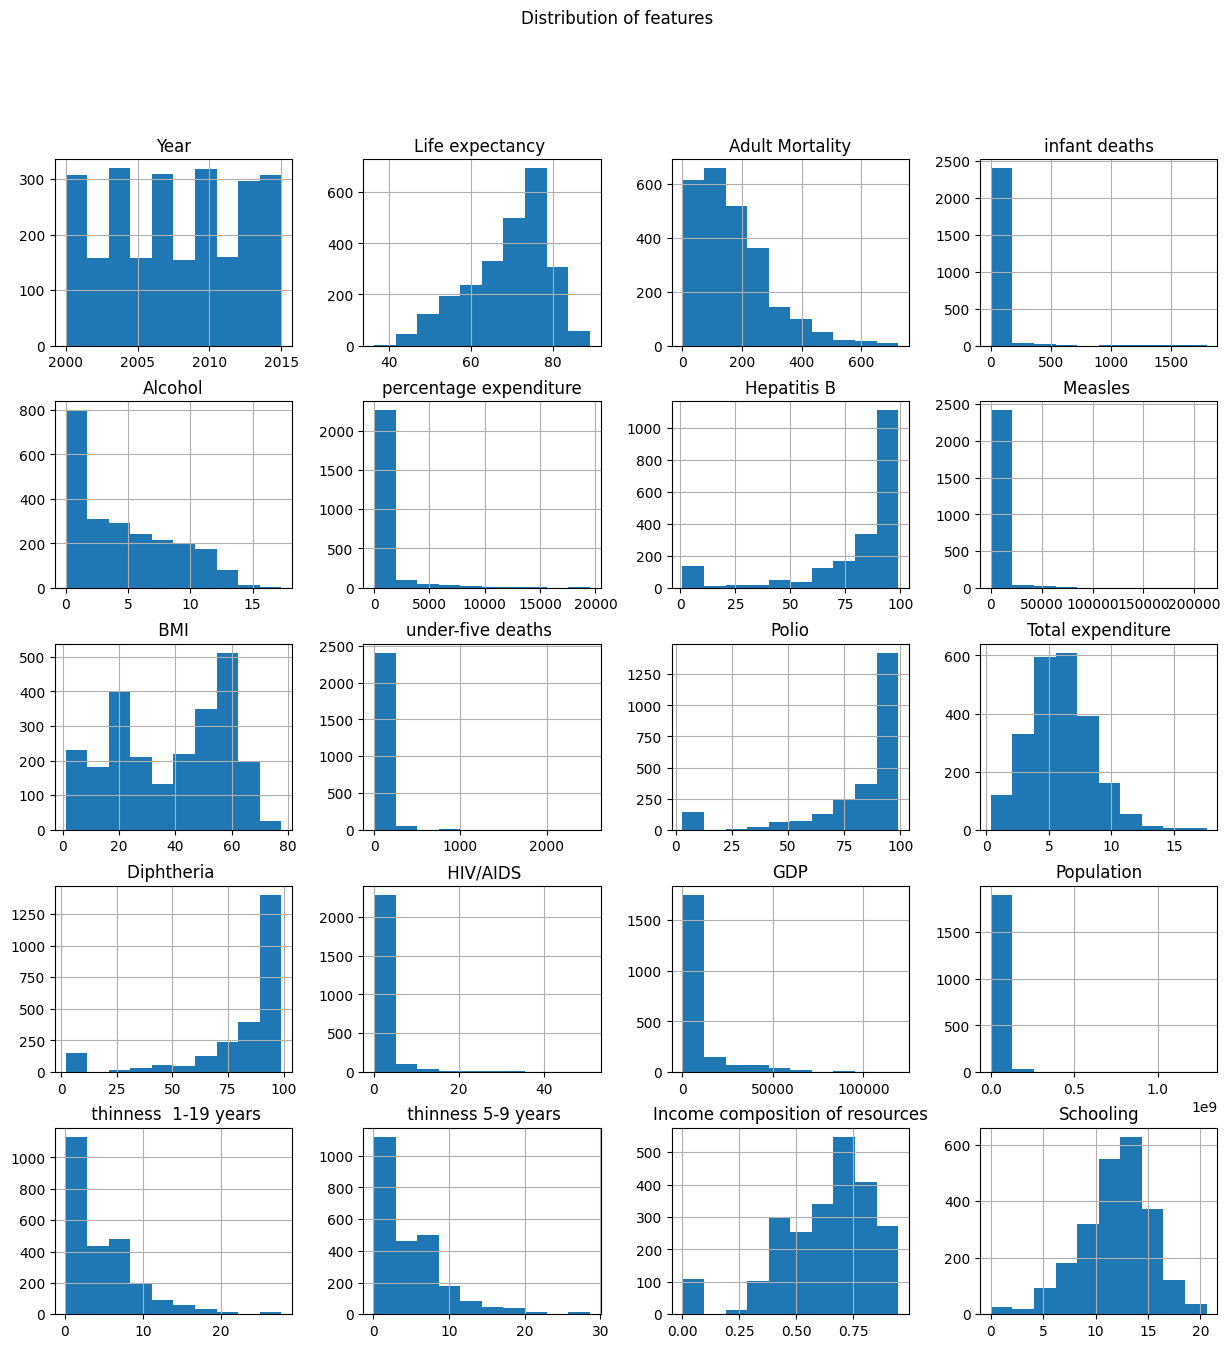

In [6]:
df.hist(figsize=(15, 15))
plt.suptitle("Distribution of features")
plt.show()

Распределение целевой переменной

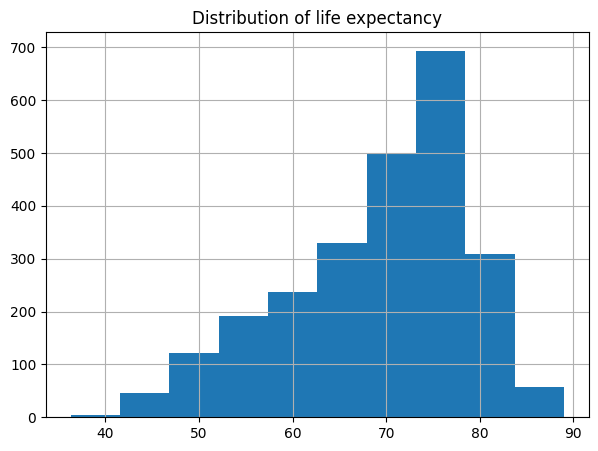

In [7]:
plt.figure(figsize=(7, 5))
df['Life expectancy '].hist()
plt.title("Distribution of life expectancy")
plt.show()

In [8]:
df.dtypes

,0
Year,int64
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64
BMI,float64
under-five deaths,int64


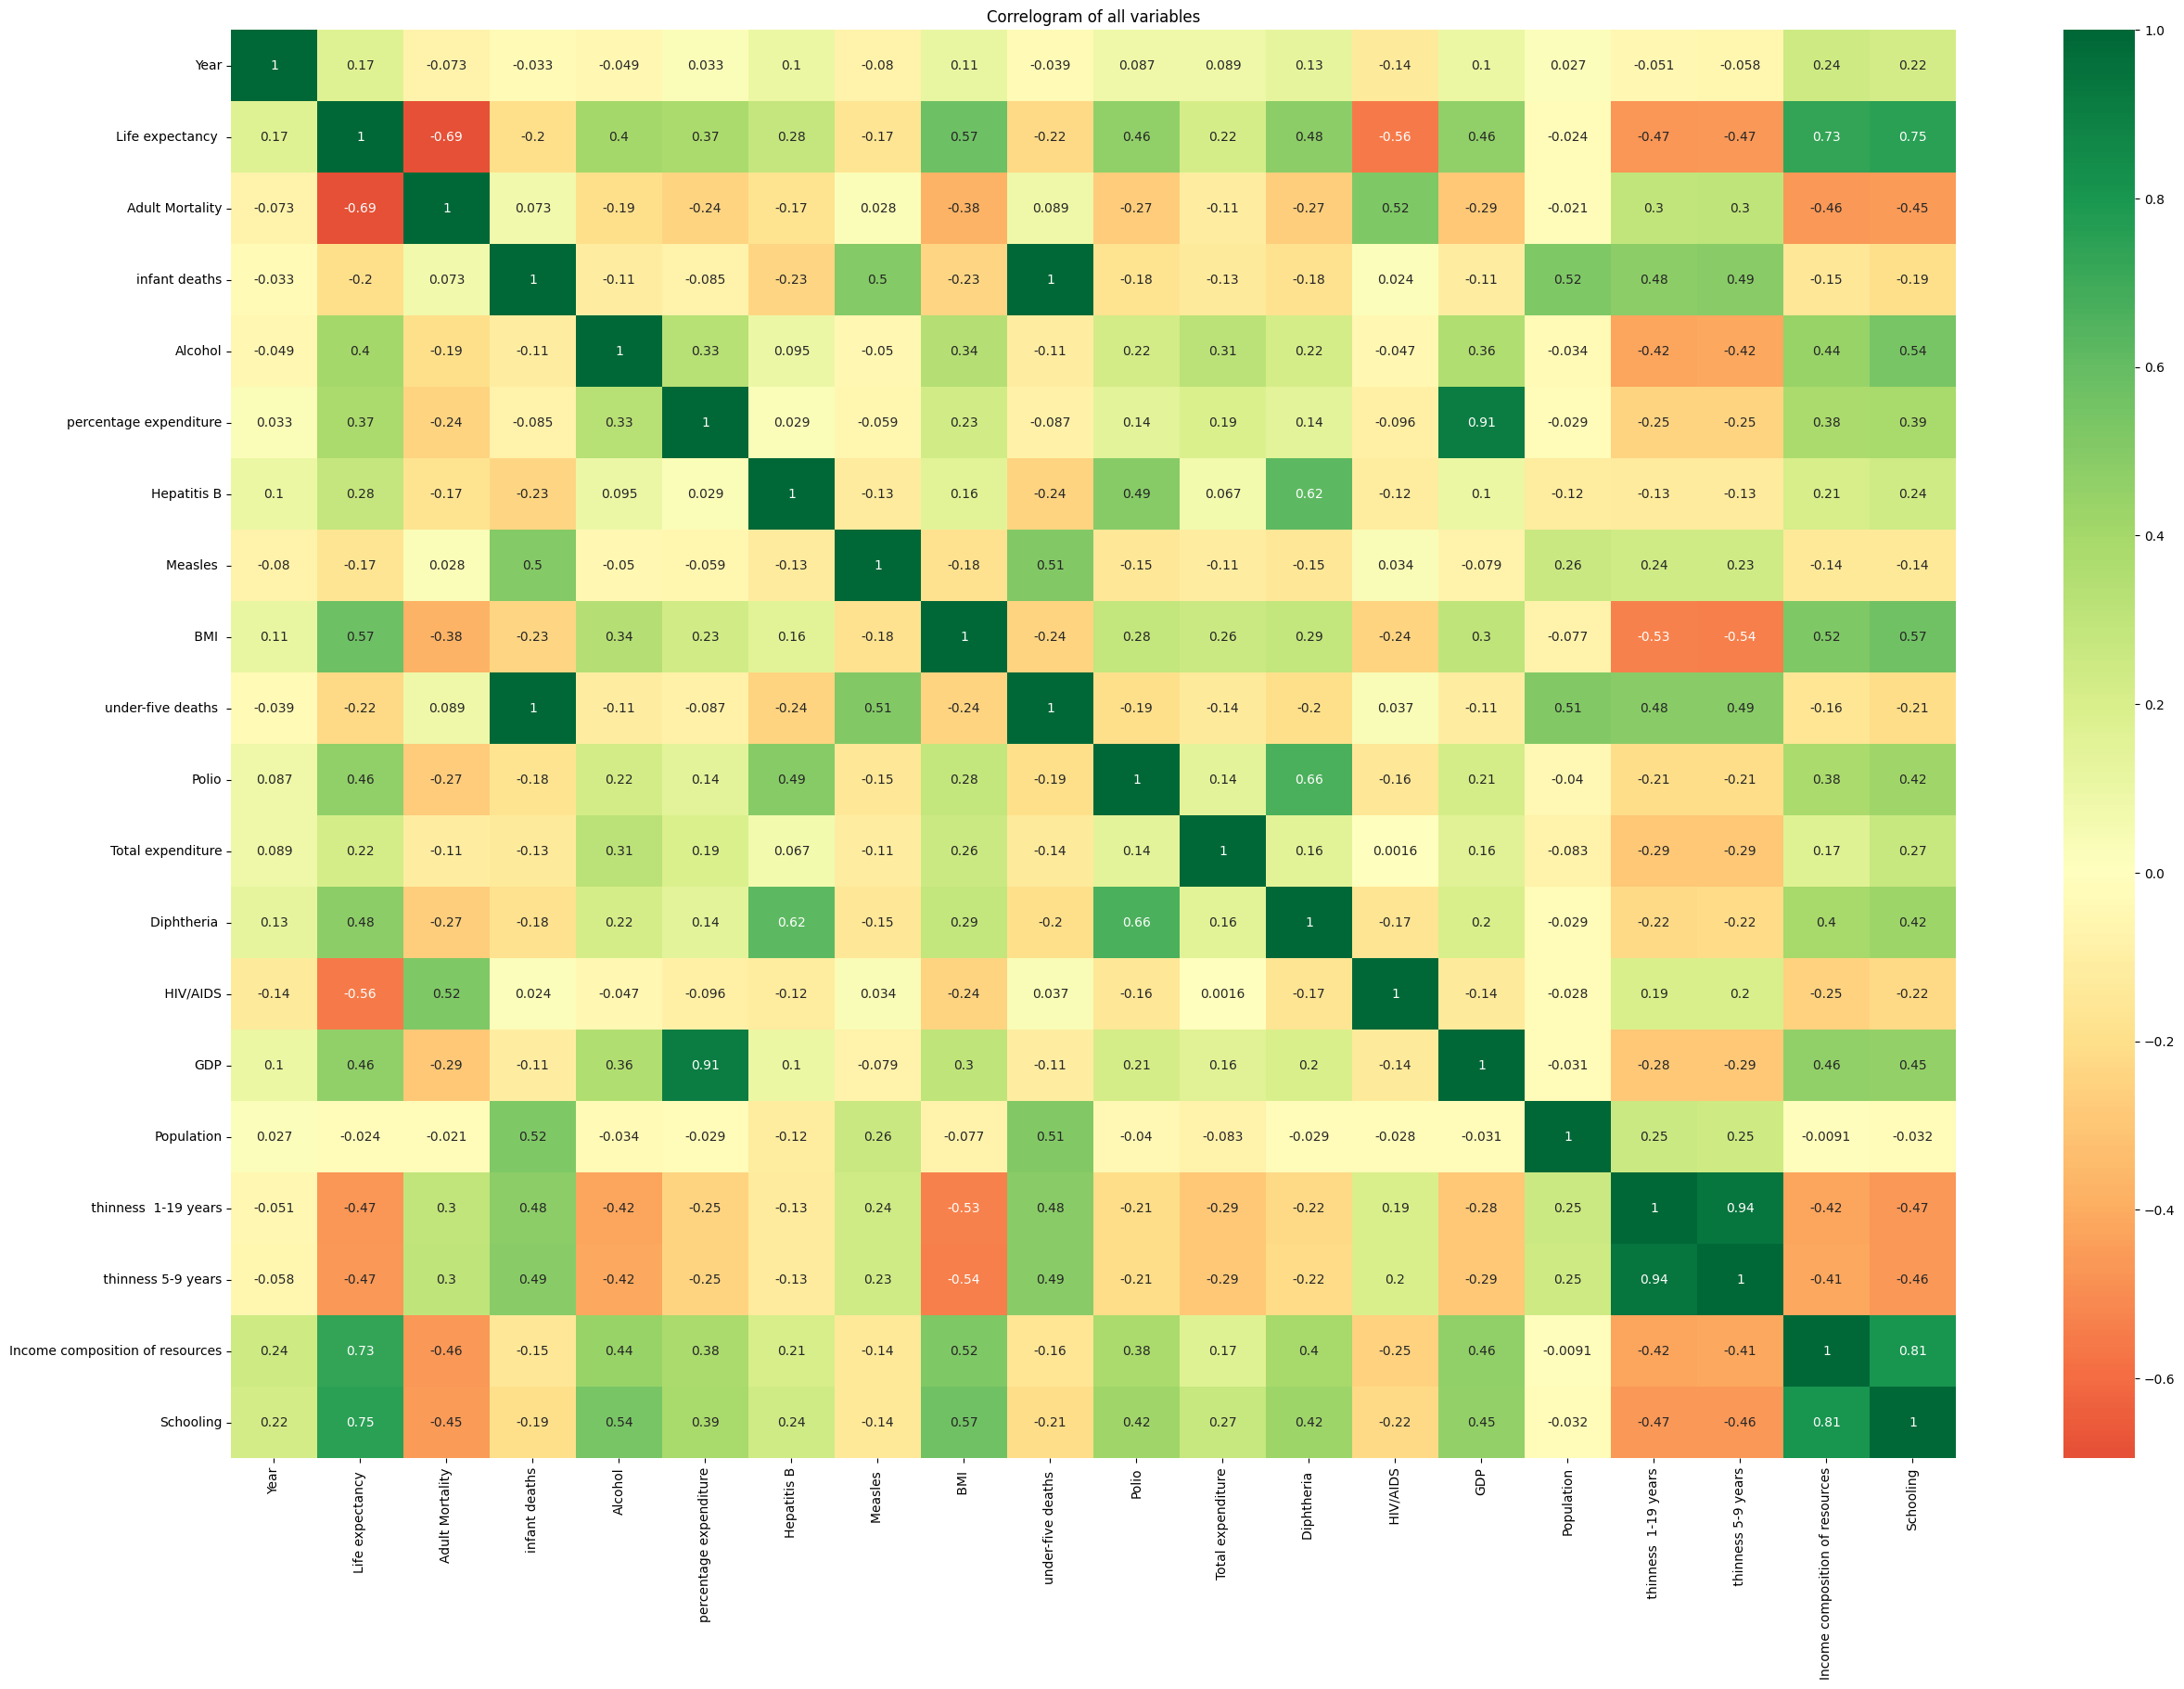

In [9]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of all variables')
plt.show()

In [10]:
df.drop(['infant deaths', 'percentage expenditure', ' thinness 5-9 years'], axis=1, inplace=True)
test_df.drop(['infant deaths','percentage expenditure', ' thinness 5-9 years'], axis=1, inplace=True)
df

,Year,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,2014,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
1,2013,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
2,2012,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
3,2011,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
4,2010,58.8,279.0,0.01,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,44.6,717.0,4.14,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,0.406,9.3
2485,2004,44.3,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2486,2003,44.5,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2487,2002,44.8,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0


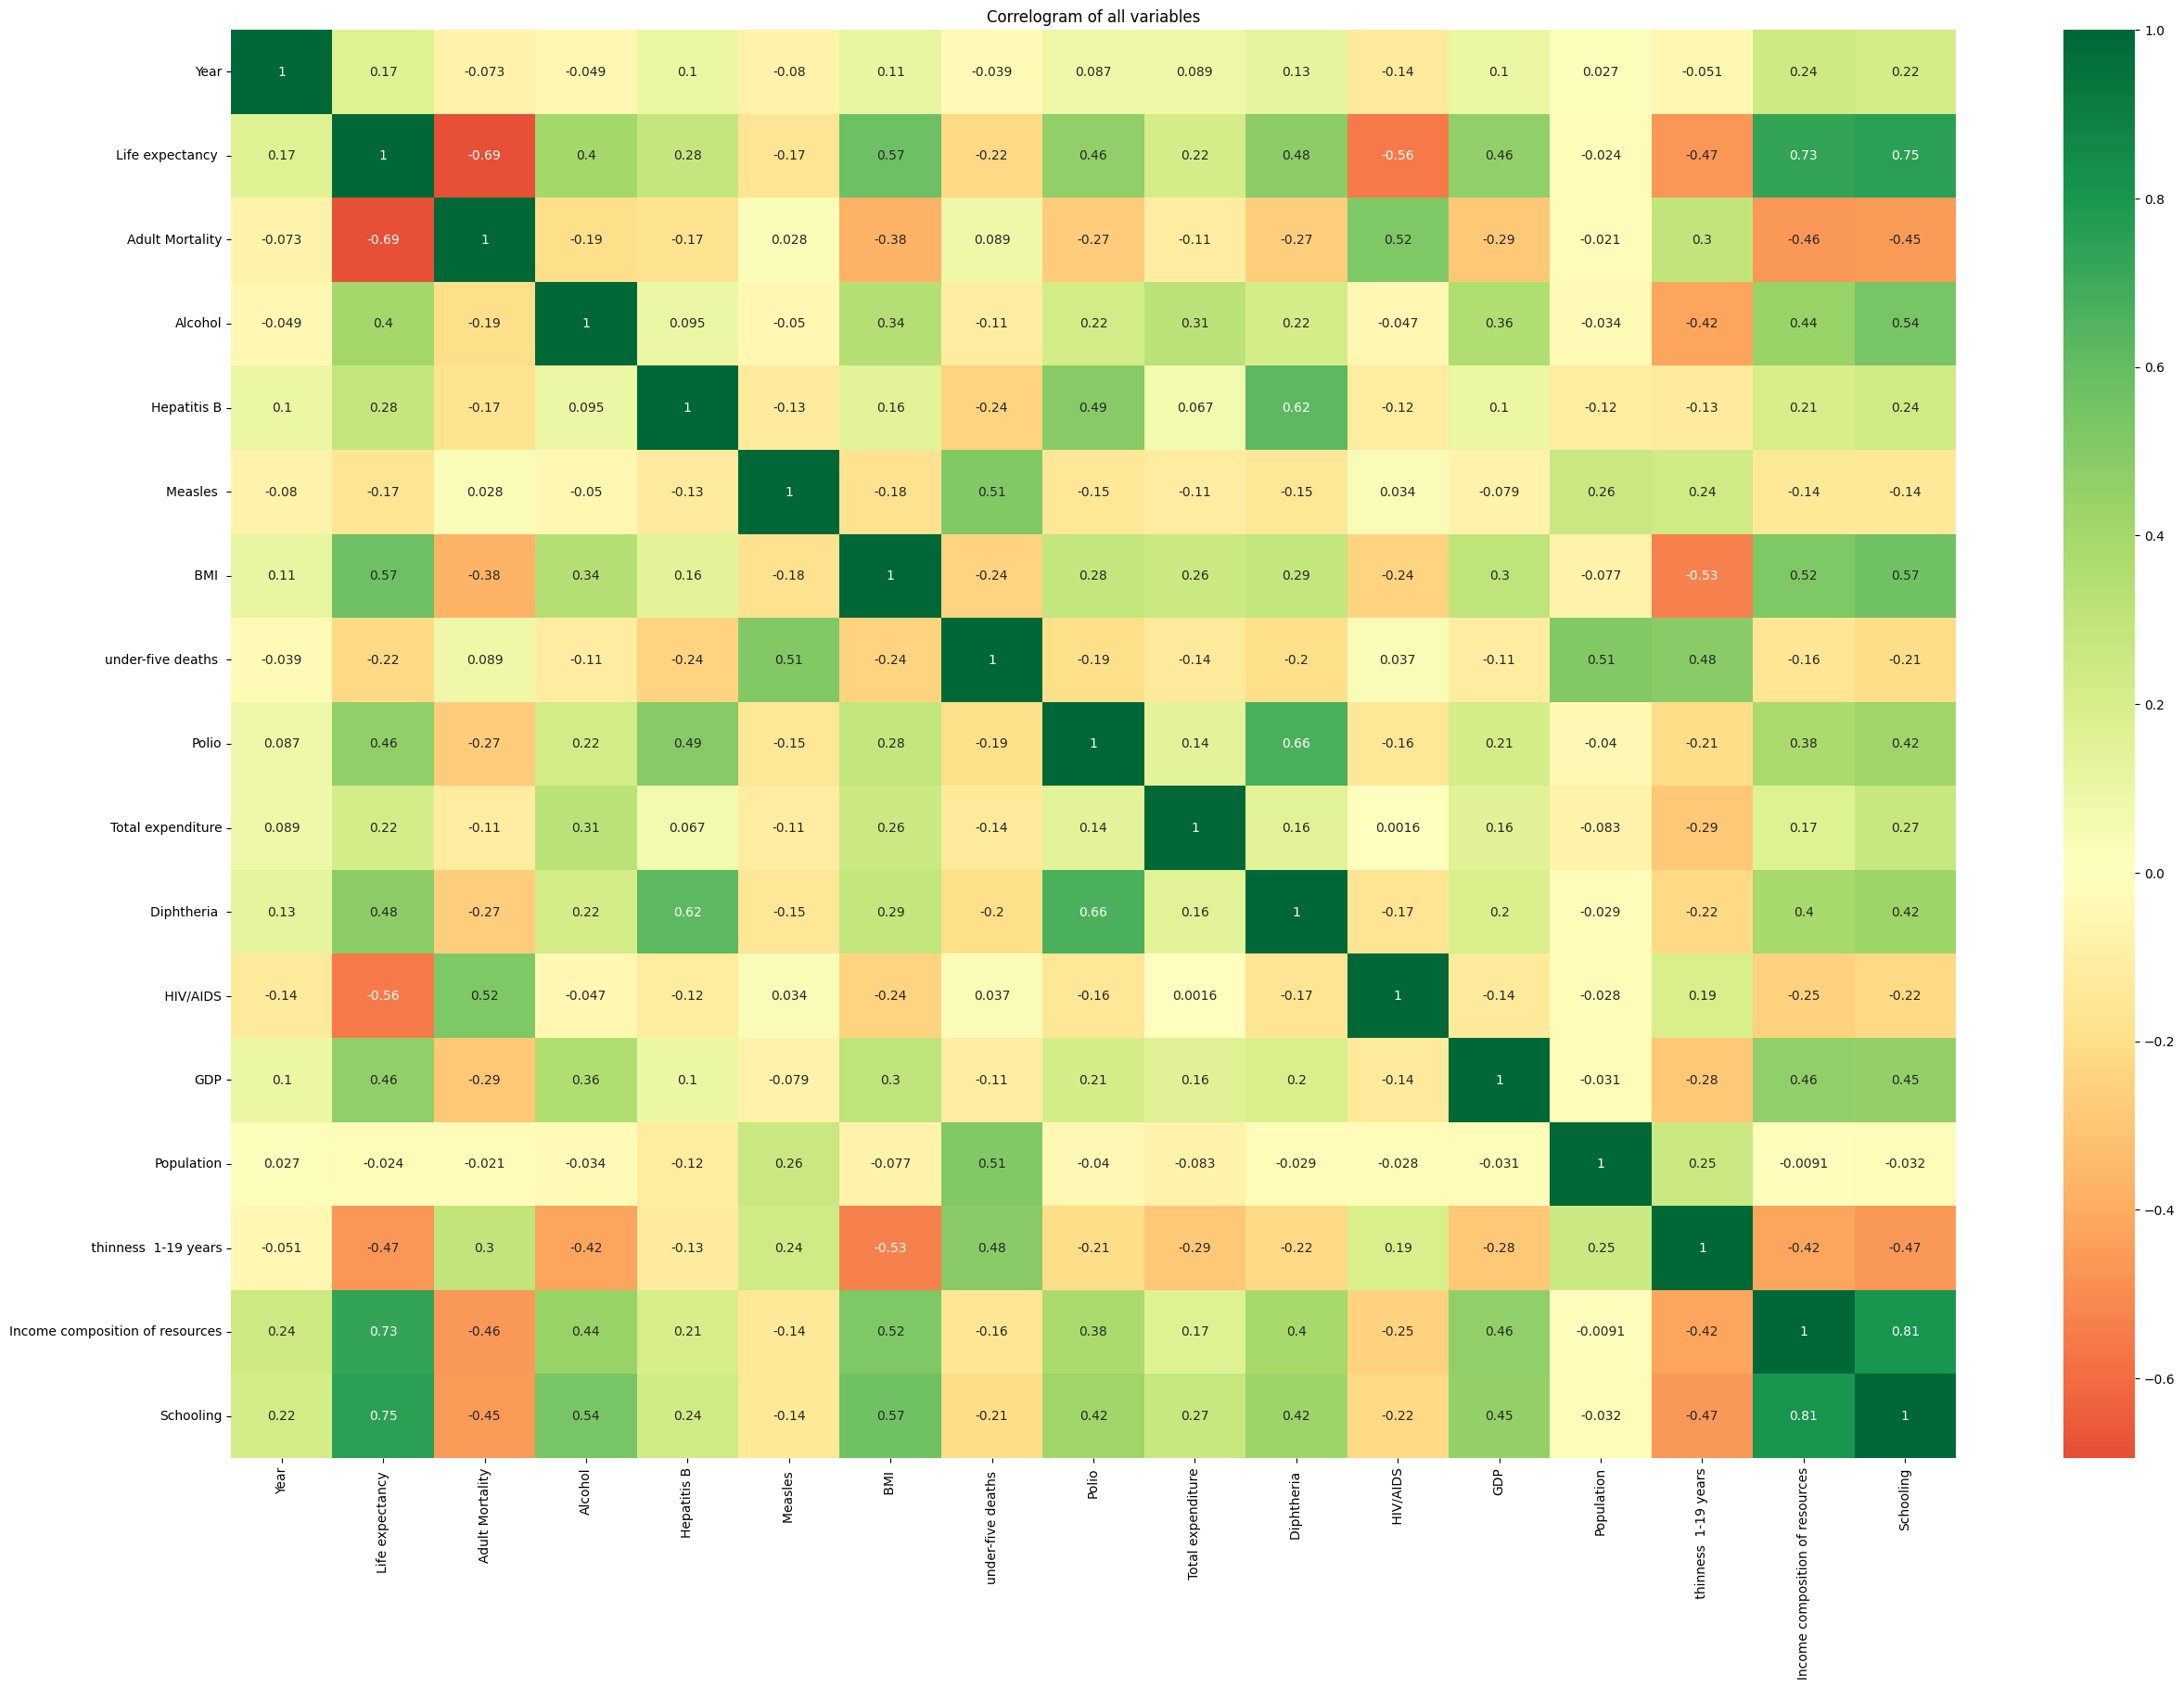

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of all variables')
plt.show()

In [12]:
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [13]:
for i in test_df.columns:
    df[i].fillna(df[i].median(), inplace=True)
    test_df[i].fillna(df[i].median(), inplace=True)

<ipython-input-13-87b7d1d6f61c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
<ipython-input-13-87b7d1d6f61c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standartized_test_df = pd.DataFrame(scaler.fit_transform(test_df), index=test_df.index, columns=test_df.columns)

X = df.drop('Life expectancy ', axis=1)
X_std = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

y = df['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

18.72357779089151

In [23]:
test_predictions = model.predict(standartized_test_df)

In [24]:
submission = pd.DataFrame({
    'index': test_df.index,
    'Life expectancy': test_predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()

,index,Life expectancy
0,0,75.310113
1,1,75.126533
2,2,73.456515
3,3,62.807929
4,4,65.325251
